# Fashion-MNIST
- (~,28,28) : 2차원을 뜻함 -> 1차원으로 변환 후 인식가능

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

print('x_train_shape :', x_train.shape, 'y_train_shape :', y_train.shape)

x_train_shape : (60000, 28, 28) y_train_shape : (60000,)


x_train_shape : (60000, 28, 28) y_train_shape : (60000,)
60000 train_set
10000 test_set
y = 8 Bag


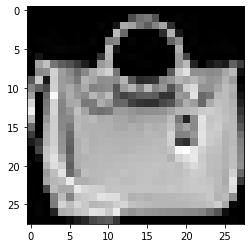

In [10]:
print('x_train_shape :', x_train.shape, 'y_train_shape :', y_train.shape)

print(x_train.shape[0], 'train_set')
print(x_test.shape[0], 'test_set')

fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

img_index = np.random.randint(0,59999)  # 0~59,999 사이 아무 값을 선정

label_index = y_train[img_index]        # 그 값을 인덱스로한 y_train 값

# 그 값을 나타냄
print('y = ' + str(label_index) + ' ' + (fashion_mnist_labels[label_index]))

# 그림으로 나타냄
plt.imshow(x_train[img_index], cmap='gray')

### 전처리
- x : 2차원을 1차원으로 / 정규화
- y : 멀티클래스 (y 값의 개수)

In [11]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [12]:
# 2차원을 1차원화

x_train = x_train.reshape([x_train.shape[0], -1])
x_test = x_test.reshape([x_test.shape[0], -1])

x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [15]:
print(x_train.max(), x_train.min())

255 0


In [21]:
# x값 정규화

xtrain_max = x_train.max()
xtrain_min = x_train.min()

xtest_max = x_test.max()
xtest_min = x_test.min()

x_train = (x_train - xtrain_min) / (xtrain_max - xtrain_min)
x_test = (x_test - xtest_min) / (xtest_max - xtest_min)

print(x_train.max(), x_train.min())
print(x_test.max(), x_test.min())

1.0 0.0
1.0 0.0


In [22]:
# y : one-hot-encoding

from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [23]:
#### 모델링 : Functional API

# 청소
keras.backend.clear_session()

# 모델 연결
il = keras.layers.Input(shape=(784,))

# 1차원화 안했을 때
# il = keras.layers.Input(shape=(28,28))
# fl = keras.layers.Flatten()(il)               # 2차원을 펼쳐줌.
# hl = keras.layers.Dense(512, activation='relu', name='h1')(fl)

hl = keras.layers.Dense(512, activation='relu', name='h1')(il)
hl = keras.layers.Dense(512, activation='relu', name='h2')(hl)
hl = keras.layers.Dense(512, activation='relu', name='h3')(hl)
hl = keras.layers.Dense(512, activation='relu', name='h4')(hl)
ol = keras.layers.Dense(10, activation='softmax', name='output')(hl)

# 모델 선언
model = keras.models.Model(il,ol)

# 모델 설정
model.compile(loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'],
              optimizer=keras.optimizers.Adam(0.01))

# 모델 요약
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 h1 (Dense)                  (None, 512)               401920    
                                                                 
 h2 (Dense)                  (None, 512)               262656    
                                                                 
 h3 (Dense)                  (None, 512)               262656    
                                                                 
 h4 (Dense)                  (None, 512)               262656    
                                                                 
 output (Dense)              (None, 10)                5130      
                                                                 
Total params: 1,195,018
Trainable params: 1,195,018
Non-train

In [24]:
# 최적의 epoch 찾기
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss',   ## 관찰대상
                   min_delta=0,          ## 0이면 최소한 나쁘지지 않으면 괜찮
                   patience=5,           ## 몇번이나 나빠져도 참고 기다리기
                   verbose=1,
                   restore_best_weights=True)  ## 학습최적 가중치 복구!

In [25]:
# 모델 학습
model.fit(x_train,y_train,
          epochs=100, verbose=1,
          validation_split=0.2,
          callbacks=[es])

Epoch 1/100
1500/1500 [==============================] - 17s 11ms/step - loss: 0.7464 - accuracy: 0.7395 - val_loss: 0.6313 - val_accuracy: 0.7755
Epoch 2/100
1500/1500 [==============================] - 16s 11ms/step - loss: 0.5597 - accuracy: 0.8093 - val_loss: 0.5092 - val_accuracy: 0.8309
Epoch 3/100
1500/1500 [==============================] - 16s 11ms/step - loss: 0.5353 - accuracy: 0.8179 - val_loss: 0.5046 - val_accuracy: 0.8309
Epoch 4/100
1500/1500 [==============================] - 16s 11ms/step - loss: 0.5283 - accuracy: 0.8210 - val_loss: 0.4924 - val_accuracy: 0.8235
Epoch 5/100
1500/1500 [==============================] - 16s 11ms/step - loss: 0.5016 - accuracy: 0.8288 - val_loss: 0.5126 - val_accuracy: 0.8278
Epoch 6/100
1500/1500 [==============================] - 16s 11ms/step - loss: 0.4831 - accuracy: 0.8338 - val_loss: 0.5222 - val_accuracy: 0.8236
Epoch 7/100
1500/1500 [==============================] - 16s 11ms/step - loss: 0.5519 - accuracy: 0.8173 - val_loss: 0